In [102]:
import datetime
import logging

import dateutil.parser
import requests
import matplotlib.pyplot as plt
import matplotlib.dates
%matplotlib inline

# replace default logging
del logging.root.handlers[0]
logging.basicConfig(level=logging.INFO)

In [33]:
query = """
SELECT ?item ?itemLabel ?_image ?_inception ?_creator ?_creatorLabel WHERE {
  # select all paintings
  ?item wdt:P31 wd:Q3305213.
  # made with oil
  ?item wdt:P186 wd:Q296955.
  # written in english
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  # store the image
  OPTIONAL { ?item wdt:P18 ?_image. }
  # store the creation date
  OPTIONAL { ?item wdt:P571 ?_inception. }
  # store the creator
  OPTIONAL { ?item wdt:P170 ?_creator. }
}
"""

In [111]:
url = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
resp = requests.get(url, 
                    params=dict(query=query), 
                    headers={'Accept': 'application/json'})

INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): query.wikidata.org


In [112]:
data = resp.json()

In [113]:
for row in data['results']['bindings']:
    if '_inception' in row and row['_inception']['type'] == 'literal':
        try:
            date = row['_inception']['value']
            row['date'] = dateutil.parser.parse(date)
        except ValueError as e:
            logging.info("not parsed %s\n%s", date, row)
            

In [104]:
# analyze all data
dates = []
for row in data['results']['bindings']:
    if 'date' in row:
        dates.append(
            matplotlib.dates.date2num(row['date'])
        )

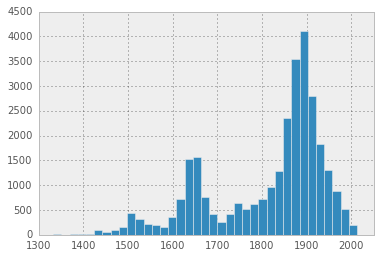

In [110]:
fig, ax = plt.subplots()
_ = ax.hist(dates, bins=100)
ax.set_xlim(matplotlib.dates.date2num(datetime.datetime(1300, 1, 1)),
            matplotlib.dates.date2num(datetime.datetime(2050, 1, 1)))
ax.xaxis_date(tz=dateutil.tz.tzutc())
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(100))
